## __Kaggle DataSets__

# __Predict the Introverts from the Extroverts__

# Dataset Description
### The dataset for this competition (both train and test) was generated from a deep learning model trained on the Extrovert vs. Introvert Behavior dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

### __Note__ - This is a relatively small dataset, so a one to use for comparing different modeling approaches, making visualization, etc.

#__Files__
### __train.csv__ - the training dataset; Personality is the categorical target
### __test.csv__ - the test dataset; your objective is to predict the Personality for each row
## __sample_submission.csv__ - a sample submission file in the correct format


In [ ]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", b

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
!pip install opendatasets --upgrade

In [ ]:
import opendatasets as od

# __Downloading the Data__

## __Dataset source:__https://www.kaggle.com/competitions/playground-series-s5e7/data

### We'll use the opendatasets library to download the data from Kaggle directly within Jupyter.

In [ ]:
od.download('https://www.kaggle.com/competitions/playground-series-s5e7/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: irurajack
Your Kaggle Key: ··········


100%|██████████| 191k/191k [00:00<00:00, 136MB/s]


Extracting archive ./playground-series-s5e7/playground-series-s5e7.zip to ./playground-series-s5e7


##The dataset is downloaded and extracted to the folder playground-series-s5e7.

In [ ]:
os.listdir('playground-series-s5e7')

['test.csv', 'sample_submission.csv', 'train.csv']

In [ ]:
train = pd.read_csv('playground-series-s5e7/train.csv')

In [ ]:
train

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [ ]:
test = pd.read_csv('playground-series-s5e7/test.csv')

In [ ]:
test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [ ]:
submission = pd.read_csv('playground-series-s5e7/sample_submission.csv')

In [ ]:
submission

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert
...,...,...
6170,24694,Extrovert
6171,24695,Extrovert
6172,24696,Extrovert
6173,24697,Extrovert


# __Cleanini data__

### Training Data cleaning

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
train.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
train_data = train.dropna()

In [ ]:
train_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
7,7,2.0,No,8.0,3.0,No,4.0,5.0,Extrovert
9,9,1.0,No,8.0,6.0,No,14.0,9.0,Extrovert
...,...,...,...,...,...,...,...,...,...
18509,18509,1.0,No,3.0,4.0,No,15.0,4.0,Extrovert
18511,18511,0.0,No,4.0,5.0,No,11.0,4.0,Extrovert
18514,18514,6.0,No,5.0,3.0,No,10.0,4.0,Extrovert
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10189 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10189 non-null  int64  
 1   Time_spent_Alone           10189 non-null  float64
 2   Stage_fear                 10189 non-null  object 
 3   Social_event_attendance    10189 non-null  float64
 4   Going_outside              10189 non-null  float64
 5   Drained_after_socializing  10189 non-null  object 
 6   Friends_circle_size        10189 non-null  float64
 7   Post_frequency             10189 non-null  float64
 8   Personality                10189 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 796.0+ KB


### Test data Cleaning

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [ ]:
test.isnull().sum()

,0
id,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408


In [ ]:
test.duplicated().sum()

np.int64(0)

In [ ]:
test_df = test.dropna()

In [ ]:
test_df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
5,18529,2.0,No,5.0,3.0,No,10.0,4.0
6,18530,3.0,No,4.0,5.0,No,15.0,5.0
...,...,...,...,...,...,...,...,...
6167,24691,1.0,No,4.0,5.0,No,7.0,6.0
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3397 entries, 2 to 6173
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3397 non-null   int64  
 1   Time_spent_Alone           3397 non-null   float64
 2   Stage_fear                 3397 non-null   object 
 3   Social_event_attendance    3397 non-null   float64
 4   Going_outside              3397 non-null   float64
 5   Drained_after_socializing  3397 non-null   object 
 6   Friends_circle_size        3397 non-null   float64
 7   Post_frequency             3397 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 238.9+ KB


## __Exploratory Data Analysis and Visualization__

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## __Training, Validation and Test Sets.__

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(train_data, test_size=0.20, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (8151, 9)
val_df.shape : (2038, 9)
test_df.shape : (3397, 8)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8151 entries, 12564 to 13202
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8151 non-null   int64  
 1   Time_spent_Alone           8151 non-null   float64
 2   Stage_fear                 8151 non-null   object 
 3   Social_event_attendance    8151 non-null   float64
 4   Going_outside              8151 non-null   float64
 5   Drained_after_socializing  8151 non-null   object 
 6   Friends_circle_size        8151 non-null   float64
 7   Post_frequency             8151 non-null   float64
 8   Personality                8151 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 636.8+ KB


### __Identifying Input and Target Columns.__

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'Personality'

In [ ]:
input_cols

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency']

In [ ]:
test_input_cols  = list(test_df.columns)[1:]

In [ ]:
test_input_cols

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency']

In [ ]:
input_cols

['Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency']

In [ ]:
target_col

'Personality'

### __We now create inputs and targets for the training, validation and test sets for further processing and model training.__

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[test_input_cols].copy()

In [ ]:
test_inputs

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0
5,2.0,No,5.0,3.0,No,10.0,4.0
6,3.0,No,4.0,5.0,No,15.0,5.0
...,...,...,...,...,...,...,...
6167,1.0,No,4.0,5.0,No,7.0,6.0
6170,3.0,No,5.0,5.0,No,9.0,6.0
6171,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,2.0,No,4.0,3.0,No,9.0,7.0


### Let view train_inputs dataframe.

In [ ]:
train_inputs

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
12564,0.0,No,6.0,7.0,No,6.0,9.0
5949,8.0,Yes,3.0,1.0,Yes,1.0,1.0
11789,1.0,No,9.0,5.0,No,8.0,10.0
5285,7.0,Yes,0.0,2.0,Yes,1.0,0.0
13242,3.0,No,9.0,5.0,No,5.0,5.0
...,...,...,...,...,...,...,...
10405,3.0,No,4.0,4.0,No,14.0,6.0
9407,3.0,No,7.0,5.0,No,4.0,3.0
9776,7.0,Yes,1.0,0.0,Yes,5.0,1.0
1591,0.0,No,6.0,7.0,No,7.0,10.0


In [ ]:
train_targets

,Personality
12564,Extrovert
5949,Introvert
11789,Extrovert
5285,Introvert
13242,Extrovert
...,...
10405,Extrovert
9407,Extrovert
9776,Introvert
1591,Extrovert


In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8151 entries, 12564 to 13202
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           8151 non-null   float64
 1   Stage_fear                 8151 non-null   object 
 2   Social_event_attendance    8151 non-null   float64
 3   Going_outside              8151 non-null   float64
 4   Drained_after_socializing  8151 non-null   object 
 5   Friends_circle_size        8151 non-null   float64
 6   Post_frequency             8151 non-null   float64
dtypes: float64(5), object(2)
memory usage: 509.4+ KB


### Let view val_inputs dataframe

In [ ]:
val_inputs

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
16041,1.0,No,4.0,4.0,No,10.0,5.0
5751,11.0,Yes,1.0,0.0,Yes,2.0,3.0
14115,0.0,No,7.0,2.0,No,7.0,3.0
1326,0.0,No,7.0,6.0,No,11.0,8.0
5688,1.0,No,4.0,6.0,No,8.0,3.0
...,...,...,...,...,...,...,...
18473,5.0,Yes,2.0,3.0,Yes,1.0,0.0
7464,0.0,No,4.0,5.0,No,4.0,8.0
7657,0.0,No,8.0,3.0,No,15.0,4.0
15032,3.0,No,7.0,5.0,No,8.0,10.0


In [ ]:
val_targets

,Personality
16041,Extrovert
5751,Introvert
14115,Extrovert
1326,Extrovert
5688,Extrovert
...,...
18473,Introvert
7464,Extrovert
7657,Extrovert
15032,Extrovert


### Let view test_inputs dataframe.

In [ ]:
test_inputs

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0
5,2.0,No,5.0,3.0,No,10.0,4.0
6,3.0,No,4.0,5.0,No,15.0,5.0
...,...,...,...,...,...,...,...
6167,1.0,No,4.0,5.0,No,7.0,6.0
6170,3.0,No,5.0,5.0,No,9.0,6.0
6171,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,2.0,No,4.0,3.0,No,9.0,7.0


## __We Identify Numerical and Categorical Columns.__

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

In [ ]:
train_inputs[numeric_cols].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000
mean,2.646056,5.676727,4.434548,8.483499,5.505091
std,2.648622,2.604931,1.883699,4.079810,2.704814
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,3.000000,5.000000,3.000000
50%,2.000000,6.000000,5.000000,9.000000,6.000000
75%,3.000000,8.000000,6.000000,12.000000,8.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


### __We  check the number of categories in each of the categorical columns.__

In [ ]:
train_inputs[categorical_cols].nunique()

,0
Stage_fear,2
Drained_after_socializing,2


In [ ]:
train_inputs[numeric_cols].isna().sum()

,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0


#### All our Numerical Columns have no null values so we don't need to use SimpleImputer

### __We Scaling Numeric Features.__

Scaling numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$.
Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss.

### __We import `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.__

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_data[numeric_cols])

MinMaxScaler()

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0)]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[np.float64(11.0),
 np.float64(10.0),
 np.float64(7.0),
 np.float64(15.0),
 np.float64(10.0)]

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isnull().sum()

,0
Time_spent_Alone,0
Social_event_attendance,0
Going_outside,0
Friends_circle_size,0
Post_frequency,0


### We can now verify that values in each column lie in the range $(0,1)$

In [ ]:
train_inputs[numeric_cols].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,8151.000000,8151.000000,8151.000000,8151.000000,8151.000000
mean,0.240551,0.567673,0.633507,0.565567,0.550509
std,0.240784,0.260493,0.269100,0.271987,0.270481
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.400000,0.428571,0.333333,0.300000
50%,0.181818,0.600000,0.714286,0.600000,0.600000
75%,0.272727,0.800000,0.857143,0.800000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_inputs[numeric_cols].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,3397.000000,3397.000000,3397.000000,3397.000000,3397.000000
mean,0.240025,0.570445,0.631313,0.564498,0.551575
std,0.238789,0.261515,0.266260,0.270501,0.271596
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.400000,0.428571,0.333333,0.300000
50%,0.181818,0.600000,0.714286,0.533333,0.600000
75%,0.272727,0.800000,0.857143,0.800000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Encoding Categorical Data

In [ ]:
train_inputs[categorical_cols].nunique()

,0
Stage_fear,2
Drained_after_socializing,2


In [ ]:
test_inputs[categorical_cols].nunique()

,0
Stage_fear,2
Drained_after_socializing,2


In [ ]:
val_inputs[categorical_cols].nunique()

,0
Stage_fear,2
Drained_after_socializing,2


### We import OneHotEncoder class from sklearn.preprocessing.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
?OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoder.categories_

[array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object)]

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Stage_fear_No', 'Stage_fear_Yes', 'Drained_after_socializing_No', 'Drained_after_socializing_Yes']


In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs[encoded_cols].isnull().sum()

,0
Stage_fear_No,0
Stage_fear_Yes,0
Drained_after_socializing_No,0
Drained_after_socializing_Yes,0


In [ ]:
X_train =train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train.head(5)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
12564,0.000000,0.6,1.000000,0.400000,0.9,1.0,0.0,1.0,0.0
5949,0.727273,0.3,0.142857,0.066667,0.1,0.0,1.0,0.0,1.0
11789,0.090909,0.9,0.714286,0.533333,1.0,1.0,0.0,1.0,0.0
5285,0.636364,0.0,0.285714,0.066667,0.0,0.0,1.0,0.0,1.0
13242,0.272727,0.9,0.714286,0.333333,0.5,1.0,0.0,1.0,0.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8151 entries, 12564 to 13202
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               8151 non-null   float64
 1   Social_event_attendance        8151 non-null   float64
 2   Going_outside                  8151 non-null   float64
 3   Friends_circle_size            8151 non-null   float64
 4   Post_frequency                 8151 non-null   float64
 5   Stage_fear_No                  8151 non-null   float64
 6   Stage_fear_Yes                 8151 non-null   float64
 7   Drained_after_socializing_No   8151 non-null   float64
 8   Drained_after_socializing_Yes  8151 non-null   float64
dtypes: float64(9)
memory usage: 636.8 KB


### We Save our processed data using pyarrow

In [ ]:
print('train_inputs:', X_train.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', X_val.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', X_test.shape)

train_inputs: (8151, 9)
train_targets: (8151,)
val_inputs: (2038, 9)
val_targets: (2038,)
test_inputs: (3397, 9)


In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('X_train.parquet')
val_inputs.to_parquet('X_val.parquet')
test_inputs.to_parquet('X_test.parquet')

In [ ]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

CPU times: user 9.99 ms, sys: 1.01 ms, total: 11 ms
Wall time: 37.7 ms


### We read the data back using `pd.read_parquet`.

In [ ]:
%%time

train_inputs = pd.read_parquet('X_train.parquet')
val_inputs = pd.read_parquet('X_val.parquet')
test_inputs = pd.read_parquet('X_test.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

CPU times: user 49.8 ms, sys: 10.5 ms, total: 60.2 ms
Wall time: 152 ms


### We verify that the data was loaded properly.

In [ ]:
print('train_inputs:', X_train.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', X_val.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', X_test.shape)

train_inputs: (8151, 9)
train_targets: (8151,)
val_inputs: (2038, 9)
val_targets: (2038,)
test_inputs: (3397, 9)


In [ ]:
X_val

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
16041,0.090909,0.4,0.571429,0.666667,0.5,1.0,0.0,1.0,0.0
5751,1.000000,0.1,0.000000,0.133333,0.3,0.0,1.0,0.0,1.0
14115,0.000000,0.7,0.285714,0.466667,0.3,1.0,0.0,1.0,0.0
1326,0.000000,0.7,0.857143,0.733333,0.8,1.0,0.0,1.0,0.0
5688,0.090909,0.4,0.857143,0.533333,0.3,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
18473,0.454545,0.2,0.428571,0.066667,0.0,0.0,1.0,0.0,1.0
7464,0.000000,0.4,0.714286,0.266667,0.8,1.0,0.0,1.0,0.0
7657,0.000000,0.8,0.428571,1.000000,0.4,1.0,0.0,1.0,0.0
15032,0.272727,0.7,0.714286,0.533333,1.0,1.0,0.0,1.0,0.0


## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

- we take linear combination (or weighted sum of the input features)
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


This is a logistic regression model since we are comparing two outcomes.



In a logistic regression model we use sigmoid function applied.



### Thus we import `LogisticRegression` class from Scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
?LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

## Now we train the model using `model.fit`.

In [ ]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
X_train.columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency', 'Stage_fear_No',
       'Stage_fear_Yes', 'Drained_after_socializing_No',
       'Drained_after_socializing_Yes'],
      dtype='object')

In [ ]:
print(model.coef_.tolist())

[[1.6703685401325183, -0.528848114812791, 0.7414878745826645, -0.4892026102455404, -0.46277501334273674, -1.7665715935843422, 1.2469215405889504, -1.2836439465191642, 0.7639938935238171]]


In [ ]:
print(model.intercept_)

[-0.51965005]


### We get the weight column input. Higher the weight, greater the impact of the column on the prediction.

In [ ]:
weight_df = pd.DataFrame({
    "feature": X_train.columns,
    "weight": model.coef_.tolist()[0]

})

In [ ]:
weight_df

,feature,weight
0,Time_spent_Alone,1.670369
1,Social_event_attendance,-0.528848
2,Going_outside,0.741488
3,Friends_circle_size,-0.489203
4,Post_frequency,-0.462775
5,Stage_fear_No,-1.766572
6,Stage_fear_Yes,1.246922
7,Drained_after_socializing_No,-1.283644
8,Drained_after_socializing_Yes,0.763994


<Axes: xlabel='weight', ylabel='feature'>

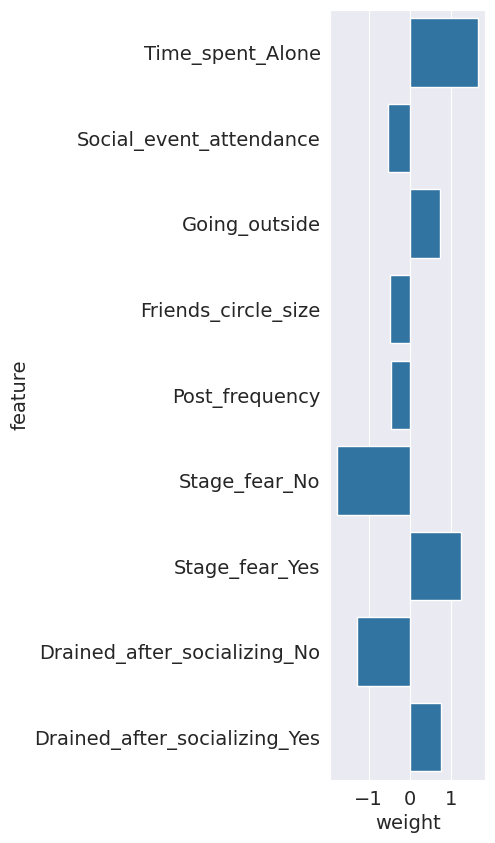

In [ ]:
plt.figure(figsize=(2,10))
sns.barplot(data=weight_df, x='weight', y='feature')

<Axes: xlabel='weight', ylabel='feature'>

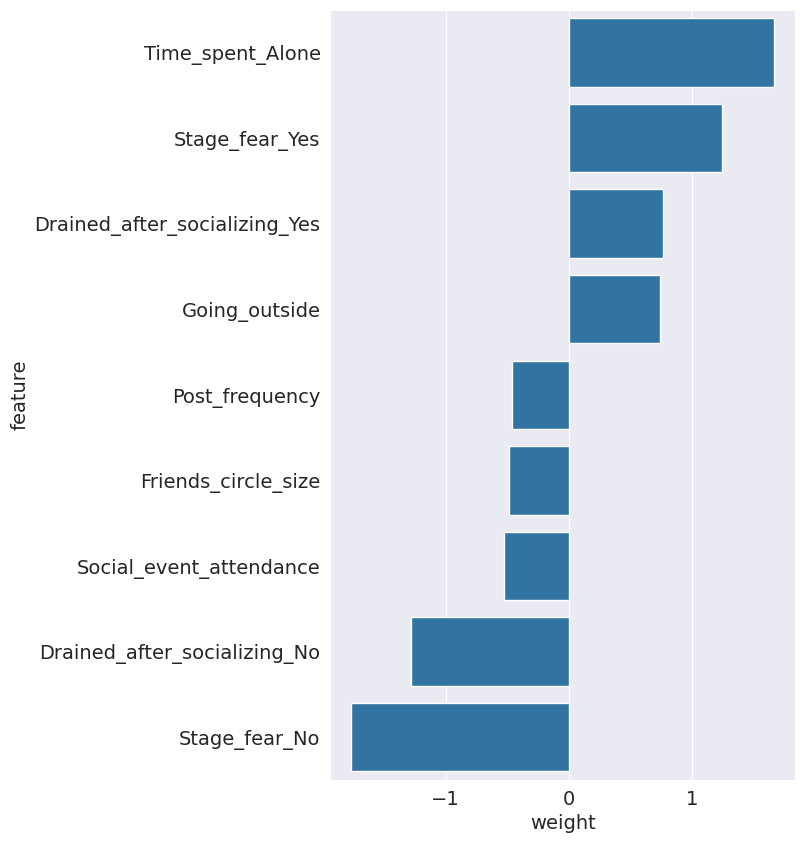

In [ ]:
plt.figure(figsize=(6,10))
sns.barplot(data=weight_df.sort_values('weight',ascending = False).head(10), x='weight', y='feature')

## Making Predictions and Evaluating the Model

Wennow use the trained model to make predictions on the training, test

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Introvert',
       'Extrovert', 'Extrovert'], dtype=object)

### Let get train probability

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.97719854, 0.02280146],
       [0.07080031, 0.92919969],
       [0.98350436, 0.01649564],
       ...,
       [0.09178791, 0.90821209],
       [0.97889173, 0.02110827],
       [0.96995326, 0.03004674]])

### Let see the numbers above indicating  the probabilities for the target classes "No" and "Yes".

In [ ]:
model.classes_

array(['Extrovert', 'Introvert'], dtype=object)

We then test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

We do this using the `accuracy_score` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.9661391240338609

#### The model achieves an accuracy of 96.6 % on the training set.

## We visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.98363582, 0.01636418],
       [0.11616515, 0.88383485]])

### We define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 96.61%


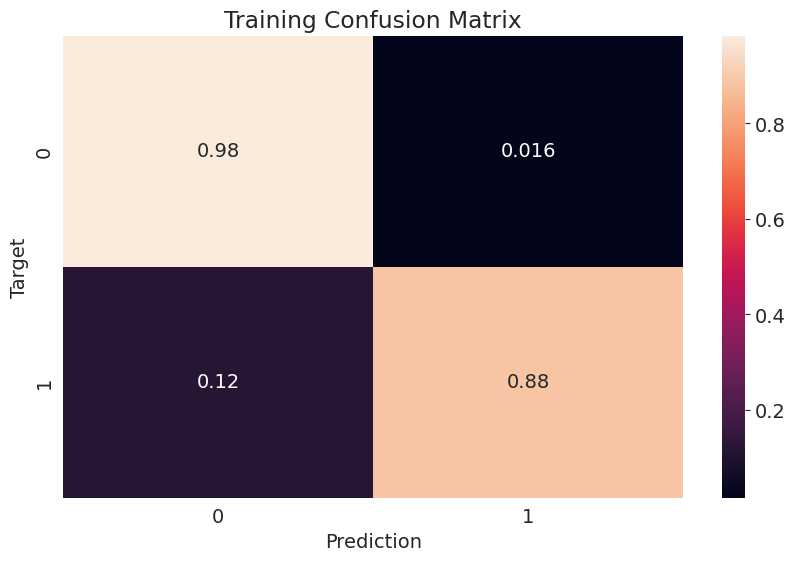

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 95.73%


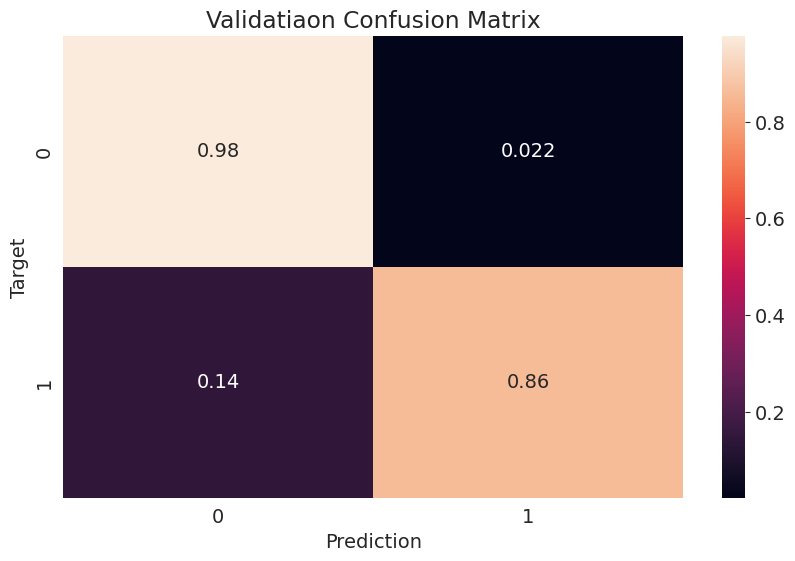

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction

array(['Extrovert', 'Extrovert', 'Introvert', ..., 'Introvert',
       'Extrovert', 'Extrovert'], dtype=object)

In [ ]:
final_submissions_df = pd.DataFrame({
    "id":test_df['id'],
    "Personality": prediction

})

In [ ]:
final_submissions_df

,id,Personality
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
5,18529,Extrovert
6,18530,Extrovert
...,...,...
6167,24691,Extrovert
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
